#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

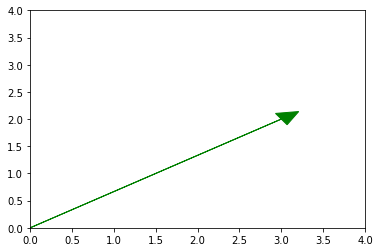

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

x = np.array([3,2])
plt.arrow(0,0,x[0],x[1],head_width=.25,head_length=0.25,color='green')
plt.xlim(0,4)          
plt.ylim(0,4)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [6]:
b = np.array([17,-4,-2,1])
print("The norm represents the length and is: ", np.linalg.norm(b))


The norm represents the length and is:  17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [11]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

print("The vectors would be orthogonal if the dot product was zero. The dot product is", np.dot(c,d), ", therefore not orthogonal")

The vectors would be orthogonal if the dot product was zero. The dot product is 42 , therefore not orthogonal


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [12]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

print(np.linalg.inv(E))
print(E.T)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [13]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [21]:
df.describe()
print("Customers mean: ", df.customers.mean())
print("Snow mean: ", df.snow.mean())
print("Customers std dev: ", df.customers.std())
print("Snow std dev: ", df.snow.std())

Customers mean:  1135.7142857142858
Snow mean:  2.7142857142857144
Customers std dev:  314.26406851866597
Snow std dev:  2.9277002188455996


In [23]:
print("customers variance: ", df.customers.var())
print("snow variance: ", df.snow.var())

customers variance:  98761.90476190478
snow variance:  8.571428571428571


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [24]:
print("Due to the differences in the scale, the variances are not comparable.")

Due to the differences in the scale, the variances are not comparable.


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [25]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [26]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [27]:
df = df.drop('Country', axis=1)

In [28]:
import sklearn
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

scaled = sklearn.preprocessing.scale(df,with_std=True)
print(scaled)

[[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]


/Users/EricJC/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [29]:
test = pd.DataFrame(scaled)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [30]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


In [31]:
test = test.apply(lambda x : x/1.154701)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.570082,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697563,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,0.464021,-1.106060,1.038240,0.998042,1.330127,1.340570,0.377324,0.947023,1.213891,0.072803,1.014638,0.804795,1.454457,1.393815,-1.216104,0.729040,0.838418
2,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156877,-0.614734,-0.429864,1.310463,-0.760978,-0.049855,-0.740950,-0.404656,1.031199,0.620562,0.646780
3,-1.498123,1.318181,-1.284420,-1.268698,0.167663,-0.985238,1.169330,-1.079938,-1.111157,-1.092052,-0.951223,-1.393553,-0.155508,-0.944197,0.561826,-1.440532,-1.365424


In [32]:
scaled = scaled/1.154701

In [33]:
scaled

array([[ 0.57008235, -0.01515151, -0.22477353,  0.55822706, -0.54769953,
         0.11306015, -0.38977675,  0.74764968,  0.32712887, -0.29121399,
         0.69756346,  0.63861301, -0.55799922, -0.04496178, -0.37692105,
         0.09093061, -0.11977403],
       [ 0.46402051, -1.10606016,  1.03823964,  0.99804232,  1.33012742,
         1.3405704 ,  0.37732382,  0.94702293,  1.21389141,  0.0728035 ,
         1.01463776,  0.80479484,  1.45445699,  1.3938152 , -1.21610377,
         0.72904013,  0.83841822],
       [ 0.46402051, -0.19696962,  0.47095406, -0.28757152, -0.95009102,
        -0.46839207, -1.15687733, -0.61473418, -0.42986355,  1.31046294,
        -0.76097832, -0.04985455, -0.74094979, -0.40465603,  1.03119911,
         0.62056151,  0.64677977],
       [-1.49812337,  1.31818129, -1.28442017, -1.26869787,  0.16766312,
        -0.98523849,  1.16933026, -1.07993843, -1.11115673, -1.09205245,
        -0.9512229 , -1.3935533 , -0.15550798, -0.9441974 ,  0.56182572,
        -1.44053224

In [34]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000
mean,0.000000,0.000000,-5.551115e-17,0.000000,-6.938894e-18,2.775558e-17,-5.551115e-17,0.000000,5.551115e-17,-5.551115e-17,0.000000,-5.551115e-17,-1.387779e-17,-2.775558e-17,0.000000,0.000000,0.000000
std,1.000000,1.000000,9.999996e-01,1.000000,9.999996e-01,9.999996e-01,9.999996e-01,1.000000,9.999996e-01,9.999996e-01,1.000000,9.999996e-01,9.999996e-01,9.999996e-01,1.000000,1.000000,1.000000
min,-1.498123,-1.106060,-1.284420e+00,-1.268698,-9.500910e-01,-9.852385e-01,-1.156877e+00,-1.079938,-1.111157e+00,-1.092052e+00,-0.951223,-1.393553e+00,-7.409498e-01,-9.441974e-01,-1.216104,-1.440532,-1.365424
25%,-0.026515,-0.424242,-4.896852e-01,-0.532853,-6.482974e-01,-5.976037e-01,-5.815519e-01,-0.731035,-6.001868e-01,-4.914236e-01,-0.808539,-3.857792e-01,-6.037369e-01,-5.395414e-01,-0.586717,-0.291935,-0.431187
50%,0.464021,-0.106061,1.230903e-01,0.135328,-1.900182e-01,-1.776660e-01,-6.226466e-03,0.066458,-5.136734e-02,-1.092052e-01,-0.031707,2.943792e-01,-3.567536e-01,-2.248089e-01,0.092452,0.355746,0.263503
75%,0.490536,0.318182,6.127755e-01,0.668181,4.582792e-01,4.199377e-01,5.753254e-01,0.797493,5.488195e-01,3.822184e-01,0.776832,6.801585e-01,2.469833e-01,3.147325e-01,0.679169,0.647681,0.694689
max,0.570082,1.318181,1.038240e+00,0.998042,1.330127e+00,1.340570e+00,1.169330e+00,0.947023,1.213891e+00,1.310463e+00,1.014638,8.047948e-01,1.454457e+00,1.393815e+00,1.031199,0.729040,0.838418


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [35]:
from numpy import array

pca = PCA()
pca.fit(scaled)
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
B = pca.transform(scaled)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]
 [ 0.18723888  0.15327713 -0.30439545  0.20499304 -0.34010234 -0.05073161
  -0.11338943  0.35064519  0.07333507 -0.32037834  0.33340494  0.2428402
  -0.38616448 -0.14839777 -0.17168328 -0.11736728 -0.24529742]
 [ 0.17165789  0.85297375  0.2548293   0.09175863  0.16764087 -0.09533182
  -0.11436716 -0.12715946  0.22349508 -0.02440372 -0.05655196  0.13312627
   0.05709713  0.04724899 -0.01433623 -0.05167119  0.15276267]]

 Eigenvalues: 
 [1.16157288e+01 4.22811564e+00 1.15614193e+00 1.63029124e-31]

 Projected Data: 
 [[-8.26612117e-01  2.84331896e-01  1.584

Text(0, 0.5, 'Principal Component 2')

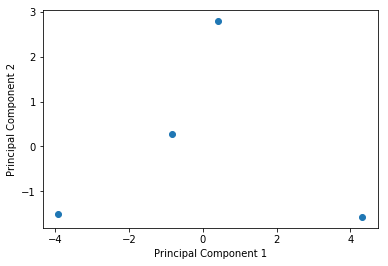

In [36]:
x = []
y = []

for i in B:
  x.append(i[0])
  
for i in B:
  y.append(i[1])

plt.scatter(x,y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [37]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


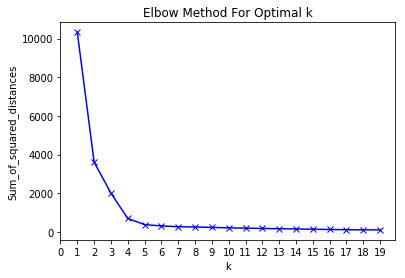

In [38]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xticks(np.arange(20))
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[2 0 0 2 0 0 2 2 3 0 0 0 0 0 2 0 2 0 0 1 2 1 1 1 0 0 0 3 0 0 0 0 0 1 0 0 0
 0 3 0 0 1 3 3 3 0 0 0 2 0 1 2 2 3 1 0 0 3 3 2 1 0 2 3 1 3 1 3 2 3 0 0 0 0
 1 1 0 0 3 1 3 0 0 0 3 0 3 0 0 1 3 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 2 2 2 1 0
 1 0 2 0 0 3 3 1 3 1 0 0 2 0 2 0 1 3 2 0 2 0 2 3 3 0 1 2 0 3 0 0 1 0 3 0 3
 2 0 0 0 2 1 0 3 0 1 0 2 0 0 3 2 1 1 0 3 0 0 2 0 3 1 0 0 0 0 0 2 0 0 0 0 0
 0 2 1 3 0 0 2 1 2 0 3 1 1 0 0]


In [41]:
points['labels'] = labels
points.head()

,x,y,labels
0,-7.846803,-3.421277,2
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,2
4,-0.804026,-9.704457,0


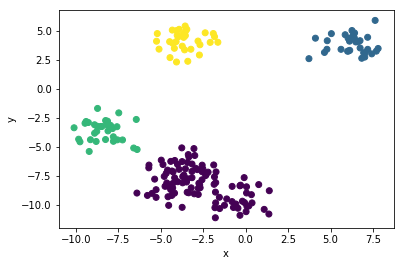

In [42]:
plt.scatter(points['x'],points['y'], c=points['labels'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Tried this plot with 5 clusters because it appears to also work


Text(0, 0.5, 'y')

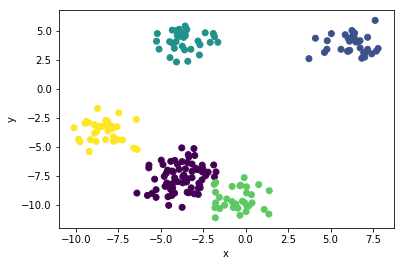

In [43]:
print("Tried this plot with 5 clusters because it appears to also work")
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_

points['labels'] = labels
plt.scatter(points['x'],points['y'], c=points['labels'])
plt.xlabel('x')
plt.ylabel('y')
